In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


telco = pd.read_csv("telco.csv")

telco.head()


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


### Step 1: Define your goal. What's the impact? Who benefits? Why does this matter?
    
Goal: identify key driver for customer churn

Impact: Churn costs money; losing customers reduces revenue and acquiring new customers cost about $315 per customer.

Industry standard: Telecommunications companies average about 2.5% monthly in churned customers

Who benefits: The company will be able to increase overall profits by reducing churn, which can also benefit the customer by allowing additional promotions

https://stlpartners.com/research/telco-economics-mobile-churn-rates-and-reduction-strategies/

<AxesSubplot:>

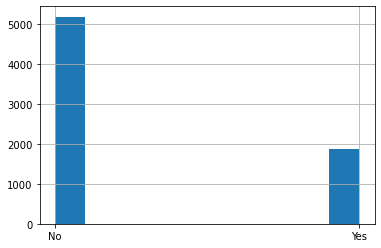

In [49]:
telco.churn.hist()

In [47]:
telco.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [50]:
telco[telco.churn == "Yes"].shape[0] / telco.shape[0] * 100
# the percentage of customers that churn is well above the monthly standard of 2.5%

26.528585614980848

In [64]:
# determine monthly lost profits for customers that churn
monthly_cost = telco[telco.churn == 'Yes'].monthly_charges.sum()
print("The monthly cost of customers that churn is: ", '$', round(monthly_cost))

The monthly cost of customers that churn is:  $ 139161


In [63]:
# determine annual lost profits for customers that churn
annual_cost = telco[telco.churn == 'Yes'].monthly_charges.sum() * 12
print("The annual cost of customers that churn is: ", '$', round(annual_cost))

The annual cost of customers that churn is:  $ 1669936


In [77]:
# determine cost of replacing churned customers (acquisition cost is $315 per new customer)

monthly_acquisition_cost = len(telco[telco.churn == 'Yes']) * 315
print("The monthly cost of acquiring new customers to replace those that churn is: ", '$', round(monthly_acquisition_cost))


The monthly cost of acquiring new customers to replace those that churn is:  $ 589050


In [82]:
# on a monthly basis, what would churning customers and acquiring their replacements cost?
print('$', (round(monthly_cost + monthly_acquisition_cost)))

$ 728211


### Step 2: Get to know your data at a high level


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [33]:
# data cleanup
# total_charges seems to have some null values
telco['is_senior_citizen'] = telco['is_senior_citizen'].replace([0, 1],['No', 'Yes']).astype('object')
# changing senior citizen to be more like partner and dependents columns

telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [40]:
# changing values of contract type to the actual contract verus 0,1,2
telco.contract_type == 1
telco.loc[telco["contract_type"] == 1, "contract_type"] = '1 year'
telco.loc[telco["contract_type"] == 2, "contract_type"] = '2 year'
telco.loc[telco["contract_type"] == 0, "contract_type"] = 'month-to-month'
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,1,1,1 year,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,2,1,month-to-month,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,No,No,No,1,2,month-to-month,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,Yes,Yes,No,1,2,month-to-month,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,Yes,Yes,No,1,2,month-to-month,Mailed check,83.9,267.40,Yes,3.2


In [46]:
# round tenure values to whole numbers
telco['tenure'] = round(telco.tenure)
telco

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,No,Yes,Yes,1,1,1 year,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,No,No,No,2,1,month-to-month,Mailed check,59.90,542.40,No,9.0
2,0004-TLHLJ,Male,No,No,No,1,2,month-to-month,Electronic check,73.90,280.85,Yes,4.0
3,0011-IGKFF,Male,Yes,Yes,No,1,2,month-to-month,Electronic check,98.00,1237.85,Yes,13.0
4,0013-EXCHZ,Female,Yes,Yes,No,1,2,month-to-month,Mailed check,83.90,267.40,Yes,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,No,No,No,1,1,1 year,Mailed check,55.15,742.90,No,14.0
7045,9992-RRAMN,Male,No,Yes,No,2,2,month-to-month,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,No,No,No,1,1,month-to-month,Mailed check,50.30,92.75,No,2.0
7047,9993-LHIEB,Male,No,Yes,Yes,1,1,2 year,Mailed check,67.85,4627.65,No,68.0


### Step 3: Answer your initial hypotheses with visuals and statistics


<AxesSubplot:xlabel='monthly_charges', ylabel='churn'>

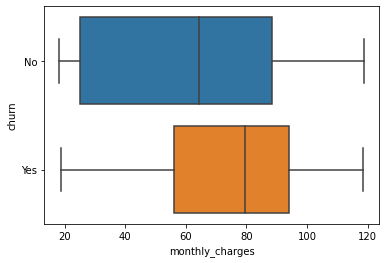

In [83]:
# customers that churn have higher monthly charges based on the median 
sns.boxplot(data = telco, x = 'monthly_charges', y = 'churn')

In [ ]:
# does family type impact costs? (single, partnered, dependents, senior citizen)
# there are slight differences in average monthly costs based off of family type
# biggest area to look into is senior citizens are paying, on average $18 more monthly than non-senior citizens
# does this have to do with contract types? or services?
# are senior citizens churning more frequently?
# contract types for phones with no internet is not impactful *****
#(prices remain $20 for 1 phone and $25 for 2 phones regradless of contract length) churned or not
# phone prices are NOT impacting churn






In [94]:
churned = telco[telco.churn == 'Yes']
not_churned = telco[telco.churn == 'No']

In [95]:
not_churned.monthly_charges.mean()

61.255136126665406

In [91]:
churned.monthly_charges.mean()

74.41783422459888

In [118]:
telco.monthly_charges.mean()

64.74701376081717

In [99]:
telco.groupby(by = 'partner').monthly_charges.mean() 
# customers with a partner pay more than the average

partner
No     61.933375
Yes    67.754726
Name: monthly_charges, dtype: float64

In [100]:
telco.groupby(by = 'is_senior_citizen').monthly_charges.mean()
#customers that are seniors pay $18 more than the average non senior customer

is_senior_citizen
No     61.832885
Yes    79.820359
Name: monthly_charges, dtype: float64

In [101]:
telco.groupby(by = 'dependents').monthly_charges.mean()

dependents
No     66.993200
Yes    59.506974
Name: monthly_charges, dtype: float64

In [115]:
telco.groupby(by = 'churn').is_senior_citizen.value_counts()
# 19% of the population is a senior citizen, and 42% of seniors churned 

churn  is_senior_citizen
No     No                   4513
       Yes                   666
Yes    No                   1394
       Yes                   476
Name: is_senior_citizen, dtype: int64

In [113]:
telco.groupby(by = 'churn').dependents.value_counts()
# of those that churned 31% did not have dependents

churn  dependents
No     No            3391
       Yes           1788
Yes    No            1543
       Yes            327
Name: dependents, dtype: int64

In [114]:
telco.groupby(by = 'churn').partner.value_counts()
# of those that churned, 33% did not have a partner

churn  partner
No     Yes        2737
       No         2442
Yes    No         1200
       Yes         670
Name: partner, dtype: int64

In [119]:
churned.groupby(by = 'is_senior_citizen').monthly_charges.mean()

is_senior_citizen
No     72.268113
Yes    80.713445
Name: monthly_charges, dtype: float64

In [122]:
telco[telco.phone_service == 1].monthly_charges.mean()

54.190235640647934

In [123]:
telco[telco.phone_service == 2].monthly_charges.mean()

82.03697408280047

In [131]:
telco.churned.groupby(by = 'phone_service').monthly_charges.mean()

phone_service
0    37.492690
1    67.184452
2    89.071176
Name: monthly_charges, dtype: float64

In [132]:
telco.churned.groupby(by = 'internet_service').monthly_charges.mean()

internet_service
0    20.368142
1    49.042826
2    88.126484
Name: monthly_charges, dtype: float64

In [133]:
telco.groupby(by = 'phone_service').monthly_charges.mean()

phone_service
0    42.011713
1    54.190236
2    82.036974
Name: monthly_charges, dtype: float64

In [134]:
telco.groupby(by = 'internet_service').monthly_charges.mean()

internet_service
0    21.076880
1    58.090772
2    91.503970
Name: monthly_charges, dtype: float64

In [154]:
len(telco[(telco.internet_service == 2) & (telco.phone_service == 0)])
# there are no customers with DSL that don't have a phone

0

In [162]:
len(churned[(churned.internet_service == 2) & (churned.phone_service == 1)]) / len(telco[(telco.internet_service == 2) & (telco.phone_service == 1)])

# 46% of customers with fiber optic and 1 phone line churned


0.45689655172413796

In [163]:
len(churned[(churned.internet_service == 2) & (churned.phone_service == 2)]) / len(telco[(telco.internet_service == 2) & (telco.phone_service == 2)])
# 40% of customers with fiber optic and 2 or more phone lines churned

0.3957688338493292

In [164]:
len(churned[(churned.internet_service == 1) & (churned.phone_service == 0)]) / len(telco[(telco.internet_service == 1) & (telco.phone_service == 0)])
# 25% of customers with DSL churned

0.25036603221083453

In [165]:
len(churned[(churned.internet_service == 1) & (churned.phone_service == 1)]) / len(telco[(telco.internet_service == 1) & (telco.phone_service == 1)])
# 20% of customers with DSL  and 1 phone line churned

0.20610687022900764

In [166]:
len(churned[(churned.internet_service == 1) & (churned.phone_service == 2)]) / len(telco[(telco.internet_service == 1) & (telco.phone_service == 2)])
# 11% of customers with DSL and 2 or more phone lines churned
# fiber optic seems to be a driver for churn 

0.10564399421128799

In [179]:
telco[(telco.internet_service == 2)]

In [169]:
telco[telco.internet_service == 1].monthly_charges.mean()

58.09077208918246

In [180]:
telco.groupby(by = 'contract_type').monthly_charges.mean()

contract_type
1 year            65.061721
2 year            60.722422
month-to-month    66.389229
Name: monthly_charges, dtype: float64

In [181]:
churned.groupby(by = 'contract_type').monthly_charges.mean()

contract_type
1 year            85.050904
2 year            86.777083
month-to-month    72.993720
Name: monthly_charges, dtype: float64

In [182]:
not_churned.groupby(by = 'contract_type').monthly_charges.mean()

contract_type
1 year            62.528740
2 year            59.964008
month-to-month    61.462635
Name: monthly_charges, dtype: float64

In [185]:
# when do churning customers leave
churned.tenure.median(), churned.tenure.mean()

(10.0, 17.95614973262032)

In [186]:
not_churned.tenure.median(), not_churned.tenure.mean()

(38.0, 37.58447576752269)

In [199]:
telco[telco.internet_service == 2].tenure.median()


30.0

In [198]:
churned[churned.internet_service == 2].tenure.median()

12.0

In [200]:
not_churned[not_churned.internet_service == 2].tenure.median()

46.0

In [201]:
telco[telco.internet_service == 1].tenure.median()

29.0

In [202]:
churned[churned.internet_service == 1].tenure.median()

5.0

In [203]:
not_churned[not_churned.internet_service == 1].tenure.median()

36.0

In [204]:
telco[telco.is_senior_citizen == 'Yes'].tenure.median()

30.0

In [205]:
telco[(telco.is_senior_citizen == 'Yes') & (telco.internet_service == 2)].tenure.median()

30.0

In [217]:
telco[(telco.is_senior_citizen == 'Yes') & (telco.internet_service == 1)].tenure.median()

30.0

In [218]:
churned[(churned.is_senior_citizen == 'Yes') & (churned.internet_service == 1)].tenure.median()

6.5

In [219]:
churned[(churned.is_senior_citizen == 'Yes') & (churned.internet_service == 2)].tenure.median()

16.0

In [220]:
not_churned[(not_churned.is_senior_citizen == 'Yes') & (not_churned.internet_service == 1)].tenure.median()

45.0

In [221]:
not_churned[(not_churned.is_senior_citizen == 'Yes') & (not_churned.internet_service == 2)].tenure.median()

45.0

In [222]:
telco[(telco.is_senior_citizen == 'Yes') & (telco.phone_service == 0)].tenure.median()

28.0

In [223]:
telco[(telco.is_senior_citizen == 'Yes') & (telco.phone_service == 1)].tenure.median()

15.0

In [224]:
telco[(telco.is_senior_citizen == 'Yes') & (telco.phone_service == 2)].tenure.median()

41.0